<a href="https://colab.research.google.com/github/shebegyare131/shebegyare131/blob/main/Copy_of_Water_Using_FBprophet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [183]:
import pandas as pd 
import numpy as np  
import matplotlib.pyplot as plt 
import random
import seaborn as sns
from fbprophet import Prophet

In [186]:
#df=pd.read_csv('WQMS.csv')
#df.head()

import pandas as pd


def remove_timezone_label(data):

    pos = data.index('+00:00')

    # Slice data to get rid of the tz, then strip leading/trailing whitespace
    data = (data[:pos]).strip()

    return data


if __name__ == '__main__':
    df=pd.read_csv("WQMS.csv")

    # the apply() function is used to carry out a function on the data.
    df["created_at"] = df["created_at"].apply(remove_timezone_label)

    df.to_csv("WQMS_NEW.csv", index=False)

In [187]:

df.head()

,created_at,entry_id,Temperature,PH,Turbidity,Flow,TDS,Pressure,Volume,Colar
0,2022-03-27T15:07:07,1,29.19,7.11,0.0,2,0.0,596.75,8.34,64
1,2022-03-27T15:07:34,2,29.19,7.13,0.0,1,0.0,601.16,8.34,0
2,2022-03-27T15:07:53,3,29.19,7.13,0.0,1,0.0,603.35,8.34,3
3,2022-03-27T15:08:24,4,29.12,7.15,0.0,1,0.0,609.43,8.34,93
4,2022-03-27T15:08:40,5,29.19,7.14,0.0,2,0.0,611.78,8.34,64


In [188]:
df=df.drop(['Temperature'],axis=1)
df=df.drop(['PH'],axis=1)
df=df.drop(['Turbidity'],axis=1)
df=df.drop(['Flow'],axis=1)
df=df.drop(['TDS'],axis=1)
df=df.drop(['Pressure'],axis=1)
df=df.drop(['Volume'],axis=1)
#df=df.drop(['Colar'],axis=1)
df=df.drop(['entry_id'],axis=1)
df.head(200)


df.head()

,created_at,Colar
0,2022-03-27T15:07:07,64
1,2022-03-27T15:07:34,0
2,2022-03-27T15:07:53,3
3,2022-03-27T15:08:24,93
4,2022-03-27T15:08:40,64


In [189]:
df.tail()

,created_at,Colar
38590,2022-04-06T16:46:25,0
38591,2022-04-06T16:46:41,0
38592,2022-04-06T16:46:57,0
38593,2022-04-06T16:47:13,0
38594,2022-04-06T16:47:29,0


In [191]:
df.isnull().sum()

created_at    0
Colar         0
dtype: int64

In [192]:
df.shape

(38595, 2)

In [193]:
#conversion_rate = 85.33
#df['price'] = conversion_rate * df['price']
#df.head()

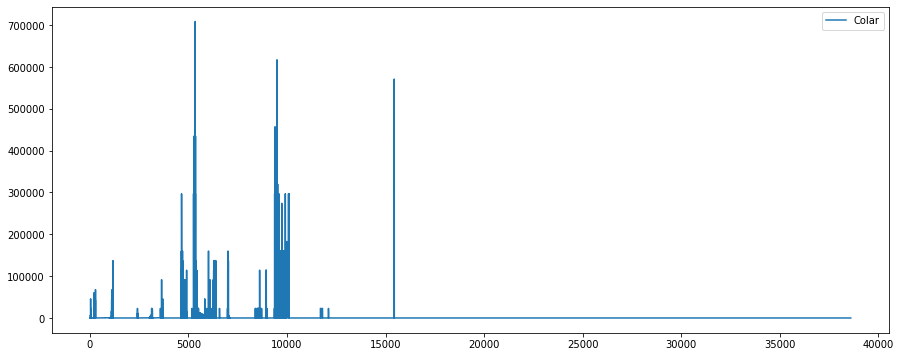

In [194]:
df.plot(figsize=(15, 6))
plt.show()

In [195]:
df.columns = ['ds', 'y'] #required by fbprophet
df.head()

,ds,y
0,2022-03-27T15:07:07,64
1,2022-03-27T15:07:34,0
2,2022-03-27T15:07:53,3
3,2022-03-27T15:08:24,93
4,2022-03-27T15:08:40,64


In [196]:
df['ds'] = pd.to_datetime(df['ds'])
df.head()

,ds,y
0,2022-03-27 15:07:07,64
1,2022-03-27 15:07:34,0
2,2022-03-27 15:07:53,3
3,2022-03-27 15:08:24,93
4,2022-03-27 15:08:40,64


In [140]:
df = df.sort_values(by='ds')
df

,ds,y
0,2022-03-27 15:07:07,596.75
1,2022-03-27 15:07:34,601.16
2,2022-03-27 15:07:53,603.35
3,2022-03-27 15:08:24,609.43
4,2022-03-27 15:08:40,611.78
...,...,...
38590,2022-04-06 16:46:25,505.27
38591,2022-04-06 16:46:41,505.01
38592,2022-04-06 16:46:57,505.59
38593,2022-04-06 16:47:13,506.35


In [197]:
dir(Prophet)

['__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_load_stan_backend',
 'add_country_holidays',
 'add_group_component',
 'add_regressor',
 'add_seasonality',
 'construct_holiday_dataframe',
 'fit',
 'flat_growth_init',
 'flat_trend',
 'fourier_series',
 'initialize_scales',
 'linear_growth_init',
 'logistic_growth_init',
 'make_all_seasonality_features',
 'make_future_dataframe',
 'make_holiday_features',
 'make_seasonality_features',
 'parse_seasonality_args',
 'percentile',
 'piecewise_linear',
 'piecewise_logistic',
 'plot',
 'plot_components',
 'predict',
 'predict_seasonal_components',
 'predict_trend',
 'predict_uncertainty',
 'predictive_samples',
 'regressor_col

In [201]:
model = Prophet()

In [202]:
df.columns

Index(['ds', 'y'], dtype='object')

In [203]:
model.fit(df)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.


In [205]:
model.component_modes

{'additive': ['daily',
  'additive_terms',
  'extra_regressors_additive',
  'holidays'],
 'multiplicative': ['multiplicative_terms', 'extra_regressors_multiplicative']}

In [146]:
df.tail()

,ds,y
38590,2022-04-06 16:46:25,505.27
38591,2022-04-06 16:46:41,505.01
38592,2022-04-06 16:46:57,505.59
38593,2022-04-06 16:47:13,506.35
38594,2022-04-06 16:47:29,506.37


In [206]:
future_dates = model.make_future_dataframe(periods=365)

In [207]:
future_dates.tail()

,ds
38955,2023-04-02 16:47:29
38956,2023-04-03 16:47:29
38957,2023-04-04 16:47:29
38958,2023-04-05 16:47:29
38959,2023-04-06 16:47:29


In [208]:
pred = model.predict(future_dates)
pred.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,daily,daily_lower,daily_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2022-03-27 15:07:07,1025.234869,-18292.568195,25940.081843,1025.234869,1025.234869,2194.647105,2194.647105,2194.647105,2194.647105,2194.647105,2194.647105,0.0,0.0,0.0,3219.881974
1,2022-03-27 15:07:34,1024.862164,-18451.900570,25916.968209,1024.862164,1024.862164,2195.234122,2195.234122,2195.234122,2195.234122,2195.234122,2195.234122,0.0,0.0,0.0,3220.096286
2,2022-03-27 15:07:53,1024.599890,-19241.522490,22442.396228,1024.599890,1024.599890,2195.597934,2195.597934,2195.597934,2195.597934,2195.597934,2195.597934,0.0,0.0,0.0,3220.197824
3,2022-03-27 15:08:24,1024.171969,-18875.954619,24438.447939,1024.171969,1024.171969,2196.104316,2196.104316,2196.104316,2196.104316,2196.104316,2196.104316,0.0,0.0,0.0,3220.276285
4,2022-03-27 15:08:40,1023.951107,-17910.559327,23748.904895,1023.951107,1023.951107,2196.323440,2196.323440,2196.323440,2196.323440,2196.323440,2196.323440,0.0,0.0,0.0,3220.274547


In [209]:
#pred = pred[['ds', 'yhat']]
#pred

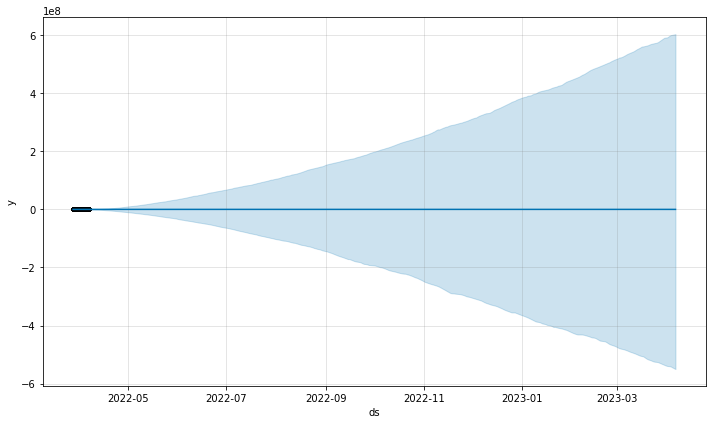

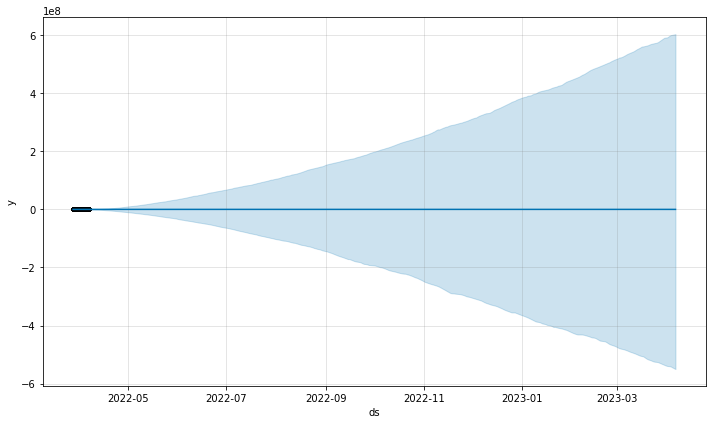

In [210]:
model.plot(pred)

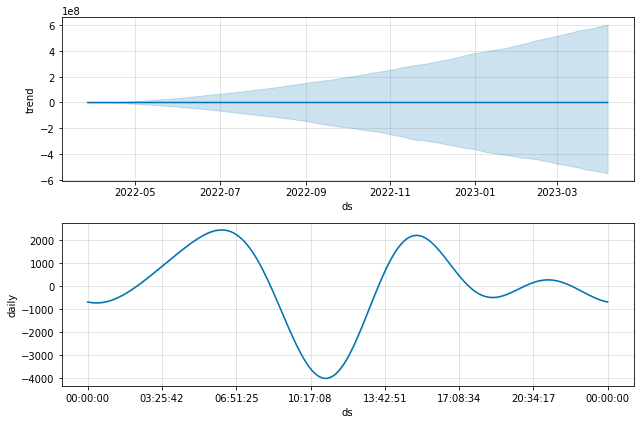

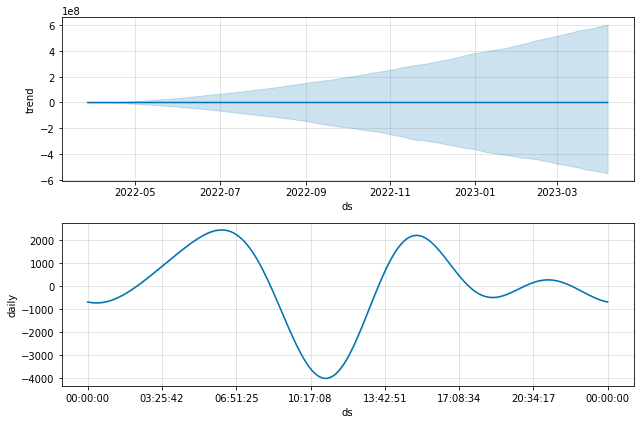

In [211]:
model.plot_components(pred)

In [212]:
from fbprophet.diagnostics import cross_validation
df_cv = cross_validation(model, initial='7 days', period='7 days', horizon='3 days')
#df_cv = cross_validation(model, initial='7 days', period='7 days', horizon='7 days')
df_cv.head()

INFO:fbprophet:Making 1 forecasts with cutoffs between 2022-04-03 16:47:29 and 2022-04-03 16:47:29


  0%|          | 0/1 [00:00<?, ?it/s]

,ds,yhat,yhat_lower,yhat_upper,y,cutoff
0,2022-04-03 16:47:30,-1152.586287,-22470.831296,23230.053090,0,2022-04-03 16:47:29
1,2022-04-03 16:47:46,-1159.349381,-25778.376521,23569.536698,0,2022-04-03 16:47:29
2,2022-04-03 16:48:02,-1166.097155,-24069.466044,26470.774041,0,2022-04-03 16:47:29
3,2022-04-03 16:48:18,-1172.829504,-24941.049922,22986.522369,0,2022-04-03 16:47:29
4,2022-04-03 16:48:34,-1179.546325,-25889.643438,25332.688274,0,2022-04-03 16:47:29


In [213]:
from fbprophet.diagnostics import performance_metrics
df_p = performance_metrics(df_cv)
df_p.head()

INFO:fbprophet:Skipping MAPE because y close to 0


,horizon,mse,rmse,mae,mdape,coverage
0,0 days 04:37:30,2.099189e+06,1448.857975,1243.473495,inf,1.0
1,0 days 04:37:51,2.097938e+06,1448.425973,1242.599456,inf,1.0
2,0 days 04:38:22,2.096673e+06,1447.989205,1241.722593,inf,1.0
3,0 days 04:38:37,2.095393e+06,1447.547261,1240.840912,inf,1.0
4,0 days 04:38:53,2.094099e+06,1447.100147,1239.954576,inf,1.0


/usr/local/lib/python3.7/dist-packages/fbprophet/plot.py:526: FutureWarning: casting timedelta64[ns] values to int64 with .astype(...) is deprecated and will raise in a future version. Use .view(...) instead.
  x_plt = df_none['horizon'].astype('timedelta64[ns]').astype(np.int64) / float(dt_conversions[i])
/usr/local/lib/python3.7/dist-packages/fbprophet/plot.py:527: FutureWarning: casting timedelta64[ns] values to int64 with .astype(...) is deprecated and will raise in a future version. Use .view(...) instead.
  x_plt_h = df_h['horizon'].astype('timedelta64[ns]').astype(np.int64) / float(dt_conversions[i])


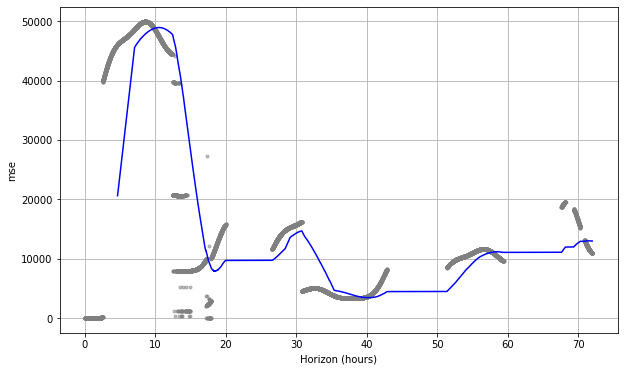

In [73]:
from fbprophet.plot import plot_cross_validation_metric
fig = plot_cross_validation_metric(df_cv, metric='mse')

/usr/local/lib/python3.7/dist-packages/fbprophet/plot.py:526: FutureWarning: casting timedelta64[ns] values to int64 with .astype(...) is deprecated and will raise in a future version. Use .view(...) instead.
  x_plt = df_none['horizon'].astype('timedelta64[ns]').astype(np.int64) / float(dt_conversions[i])
/usr/local/lib/python3.7/dist-packages/fbprophet/plot.py:527: FutureWarning: casting timedelta64[ns] values to int64 with .astype(...) is deprecated and will raise in a future version. Use .view(...) instead.
  x_plt_h = df_h['horizon'].astype('timedelta64[ns]').astype(np.int64) / float(dt_conversions[i])


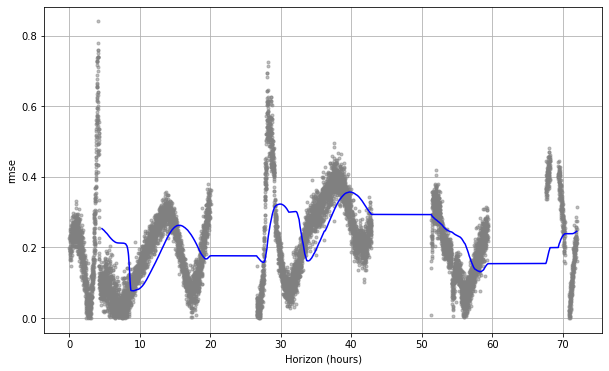

In [40]:
from fbprophet.plot import plot_cross_validation_metric
fig = plot_cross_validation_metric(df_cv, metric='rmse')

/usr/local/lib/python3.7/dist-packages/fbprophet/plot.py:526: FutureWarning: casting timedelta64[ns] values to int64 with .astype(...) is deprecated and will raise in a future version. Use .view(...) instead.
  x_plt = df_none['horizon'].astype('timedelta64[ns]').astype(np.int64) / float(dt_conversions[i])
/usr/local/lib/python3.7/dist-packages/fbprophet/plot.py:527: FutureWarning: casting timedelta64[ns] values to int64 with .astype(...) is deprecated and will raise in a future version. Use .view(...) instead.
  x_plt_h = df_h['horizon'].astype('timedelta64[ns]').astype(np.int64) / float(dt_conversions[i])


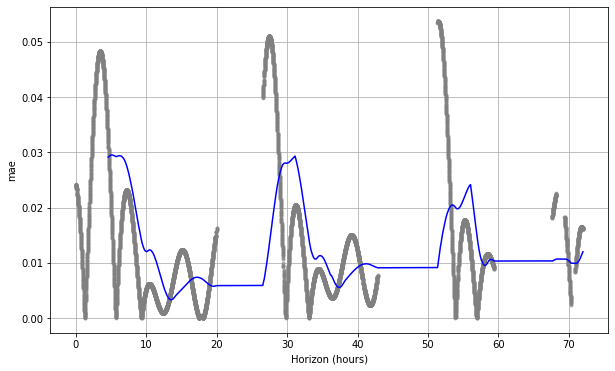

In [ ]:
from fbprophet.plot import plot_cross_validation_metric
fig = plot_cross_validation_metric(df_cv, metric='mae')

/usr/local/lib/python3.7/dist-packages/fbprophet/plot.py:526: FutureWarning: casting timedelta64[ns] values to int64 with .astype(...) is deprecated and will raise in a future version. Use .view(...) instead.
  x_plt = df_none['horizon'].astype('timedelta64[ns]').astype(np.int64) / float(dt_conversions[i])
/usr/local/lib/python3.7/dist-packages/fbprophet/plot.py:527: FutureWarning: casting timedelta64[ns] values to int64 with .astype(...) is deprecated and will raise in a future version. Use .view(...) instead.
  x_plt_h = df_h['horizon'].astype('timedelta64[ns]').astype(np.int64) / float(dt_conversions[i])


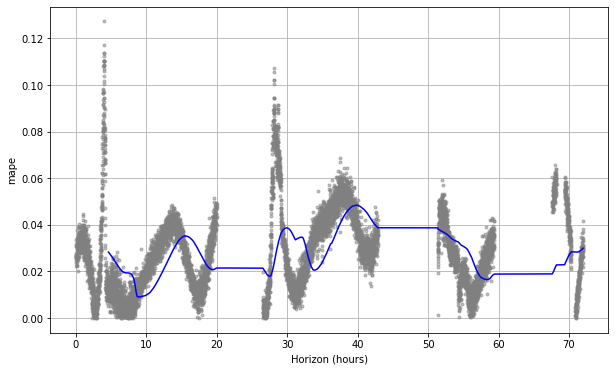

In [41]:
from fbprophet.plot import plot_cross_validation_metric
fig = plot_cross_validation_metric(df_cv, metric='mape')

/usr/local/lib/python3.7/dist-packages/fbprophet/plot.py:526: FutureWarning: casting timedelta64[ns] values to int64 with .astype(...) is deprecated and will raise in a future version. Use .view(...) instead.
  x_plt = df_none['horizon'].astype('timedelta64[ns]').astype(np.int64) / float(dt_conversions[i])
/usr/local/lib/python3.7/dist-packages/fbprophet/plot.py:527: FutureWarning: casting timedelta64[ns] values to int64 with .astype(...) is deprecated and will raise in a future version. Use .view(...) instead.
  x_plt_h = df_h['horizon'].astype('timedelta64[ns]').astype(np.int64) / float(dt_conversions[i])


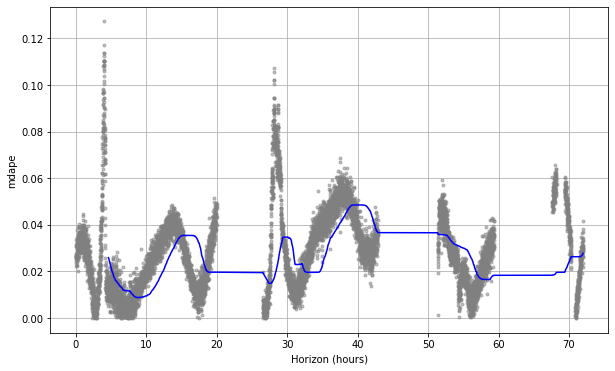

In [42]:
from fbprophet.plot import plot_cross_validation_metric
fig = plot_cross_validation_metric(df_cv, metric='mdape')